<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 8: *Clustering***

###**Tenggat Waktu: 25 Mei 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 25 Mei 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.


In [1]:
# Isi dengan data diri Anda
NAMA = "Khansa Mahira"
KELAS = "C"
NPM = "2206819413"
USERNAME_KAGGLE = "khansamahira"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "Gemini",
    "ChatGPT",
    "Perplexity AI",
    "Black Box AI",
    "DeepSeek"
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Khansa Mahira dari kelas C dengan NPM 2206819413, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Khansa Mahira)


# Import Library

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# Clustering

## Definisi

Clustering atau pengelompokan adalah salah satu teknik dalam *unsupervised learning* yang bertujuan untuk mengelompokkan data ke dalam beberapa grup (cluster) berdasarkan kemiripan atau pola tertentu. Artinya, data yang berada dalam satu cluster diharapkan memiliki karakteristik yang serupa, sedangkan data yang berada di cluster berbeda memiliki karakteristik yang berbeda pula.

Berbeda dengan *supervised learning* yang menggunakan label (target) sebagai panduan, clustering tidak memiliki label yang bisa dijadikan acuan. Jadi, kita tidak tahu sejak awal mana data yang "bagus" atau "buruk" misalnya. Justru tugas kita adalah **mencari tahu sendiri apakah ada pola atau pengelompokan yang tersembunyi** di dalam data.

Meskipun begitu, hasil clustering tidak memberikan makna eksplisit pada tiap cluster, kita perlu **menginterpretasikannya sendiri**. Ini bisa dibantu dengan visualisasi atau melihat komposisi masing-masing cluster terhadap fitur-fitur tertentu.

## Clustering buat apa?

"Kenapa tidak langsung pakai *supervised learning* saja yang jelas targetnya?". Tidak semua data memiliki label, dan membuat label seringkali mahal, sulit, atau bahkan tidak mungkin. Beberapa alasan kenapa clustering itu berguna:

1. **Eksplorasi Pola**  
   Clustering bisa membantu menemukan pola tersembunyi yang mungkin tidak kita sadari sebelumnya. Misalnya, dalam data pelanggan, bisa jadi ada kelompok dengan perilaku mirip yang bisa dijadikan target kampanye marketing tertentu.

2. **Menghemat Waktu dan Biaya**  
   Karena tidak perlu label, clustering cocok untuk kondisi di mana membuat label itu mahal atau sulit, seperti analisis artefak kuno, genomik, atau data historis.

3. **Segmentasi Data**  
   Berguna dalam membagi data ke dalam kelompok tertentu, seperti segmentasi pelanggan, tipe siswa, atau jenis wilayah.

4. **Deteksi Anomali**  
   Clustering bisa digunakan untuk mendeteksi data yang "nyeleneh" atau outlier, misalnya dalam sistem keamanan atau pendeteksian penipuan.

5. **Preprocessing**  
   Bisa dipakai sebagai langkah awal untuk menyederhanakan data sebelum digunakan di model yang lebih kompleks.

## Algoritma Clustering

Ada banyak algoritma clustering, tetapi untuk lab kali ini kita akan fokus pada dua yang paling umum:

### 1. K-Means Clustering
K-Means bekerja dengan cara mengelompokkan data ke dalam *K* cluster berdasarkan jarak ke pusat cluster (*centroid*). Algoritma ini akan menyesuaikan posisi centroid dan mengelompokkan ulang data hingga posisi centroid stabil. Kelebihannya cepat dan cocok untuk data yang bentuknya cukup "bulat" dan seimbang.

### 2. Hierarchical (Agglomerative) Clustering
Metode ini membentuk struktur seperti pohon (disebut *dendrogram*), dimulai dengan setiap data sebagai cluster tunggal lalu secara bertahap digabungkan berdasarkan kemiripan hingga semua data berada dalam satu cluster besar. Metode ini tidak perlu menentukan jumlah cluster di awal dan cocok untuk melihat struktur data yang lebih kompleks.

Selanjutnya kita akan mencoba clustering menggunakan kedua algoritma tersebut

# Preprocessing Data

In [4]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

| Atribut              | Penjelasan                                |
|--------------------- |-------------------------------------------|
| CUST_ID                    | ID pelanggan (Kategorikal)                 |
| BALANCE              | Saldo rekening pelanggan                |
| BALANCE_FREQUENCY  | Seberapa sering saldonya ter-update (1 = sering, 0 tidak) |
| PURCHASES                | Jumlah total pembelian        |
| ONEOFF_PURCHASES                | Jumlah pembelian maksimum        |
| INSTALLMENTS_PURCHASES                | Jumlah pembelian untuk kredit       |
| CASH_ADVANCE   | Uang tunai yang diberikan oleh pengguna        |
| PURCHASES_FREQUENCY  | Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)   |
| ONEOFFPURCHASESFREQUENCY  | Seberapa sering Pembelian dilakukan dalam satu kali transaksi (1 = sering dibeli, 0 = jarang dibeli)   |
| PURCHASESINSTALLMENTSFREQUENCY   | Seberapa sering pembelian dalam angsuran dilakukan (1 = sering dilakukan, 0 = jarang dilakukan) |
| CASHADVANCEFREQUENCY   | Seberapa sering uang tunai di muka dibayar   |
| CASHADVANCETRX   | Jumlah Transaksi yang dilakukan dengan CASH_ADVANCE   |
| PURCHASES_TRX     | Jumlah transaksi pembelian yang dilakukan              |
| CREDIT_LIMIT     | Batas Kartu Kredit untuk pengguna              |
| PAYMENTS   | Jumlah Pembayaran yang dilakukan oleh pengguna    |
| MINIMUM_PAYMENTS   | Jumlah pembayaran minimum yang dilakukan oleh pengguna  |
| PRCFULLPAYMENT   | Persentase pembayaran penuh yang dibayarkan oleh pengguna   |
| TENURE   | Masa pelayanan kartu kredit bagi pengguna |
> Data diambil dari [https://www.kaggle.com/datasets/arjunbhasin2013/ccdata](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [6]:
# Drop ID column
df = df.drop(['CUST_ID'], axis=1)

In [7]:
# Impute missing values
null_columns = df.columns[df.isnull().any()].tolist()

imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
df = df.fillna(df_imp)

In [8]:
# Scaling
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960383,-0.528979,-0.311615,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688676,0.818642,0.086668,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826098,-0.383805,-0.103353,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826098,-0.598688,-0.076187,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.266663,-0.525551,0.36068


In [9]:
# df tanpa PCA
df_selected = df_scaled[['BALANCE', 'CREDIT_LIMIT', 'PURCHASES']]

In [10]:
# df dengan PCA
df_pca = df_scaled.copy()
pca = PCA(n_components=12, random_state=42)
df_pca = pd.DataFrame(pca.fit_transform(df_pca))

In [11]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print(f"Cumulative explained variance: {cumulative_explained_variance}")

Cumulative explained variance: [0.27286882 0.47587463 0.56369276 0.6385519  0.70122341 0.7587203
 0.807628   0.8501495  0.8884733  0.91927175 0.94299075 0.96073613]


Nantinya ada 2 cara yang akan dibahas untuk memvisualisasi dan menginterpretasi hasil clustering, yaitu ketika menggunakan fitur yang dipilih secara manual dan ketika menggunakan PCA

# Clustering dengan K-Means

(Untuk contoh clustering dengan KMeans kita akan coba menggunakan `df_selected`)

Setelah kita menyiapkan data, langkah selanjutnya adalah menentukan **berapa banyak cluster (K)** yang paling masuk akal sebagai input algoritma KMeans. Di sini kita tidak punya label sebagai pembanding, jadi kita perlu menggunakan metrik evaluasi internal. Salah satu yang paling umum dipakai adalah **Silhouette Coefficient**.

**Silhouette Coefficient (SC)** adalah metrik yang mengukur **konsistensi** hasil clustering: seberapa dekat tiap data dengan anggota clusternya sendiri dibandingkan dengan cluster lainnya. Jadi, SC memberi kita gambaran apakah data sudah benar-benar cocok berada di dalam cluster tersebut atau justru lebih cocok pindah ke cluster lain.

Nilainya berada di antara -1 dan 1:

- Nilai mendekati **1** → data sangat mirip dengan clusternya sendiri dan sangat berbeda dengan cluster lain (ideal).
- Nilai mendekati **0** → data berada di perbatasan dua cluster.
- Nilai mendekati **-1** → data mungkin lebih cocok masuk ke cluster lain (tidak ideal).


In [12]:
# Menghitung silhouette coefficient untuk beberapa nilai k
print("Compare nilai silhouete coefficient")
print("=================================================")
for k in range(2,7):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(df_selected)
    silhouette_avg = silhouette_score(df_selected, cluster_labels, random_state=42)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg:.4f}")

Compare nilai silhouete coefficient
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.5495
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.5332
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.4553
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.4474
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.4615


Untuk membantu analisis, kita bisa memvisualisasikan hasil perhitungan Silhouette Coefficient menggunakan SilhouetteVisualizer.

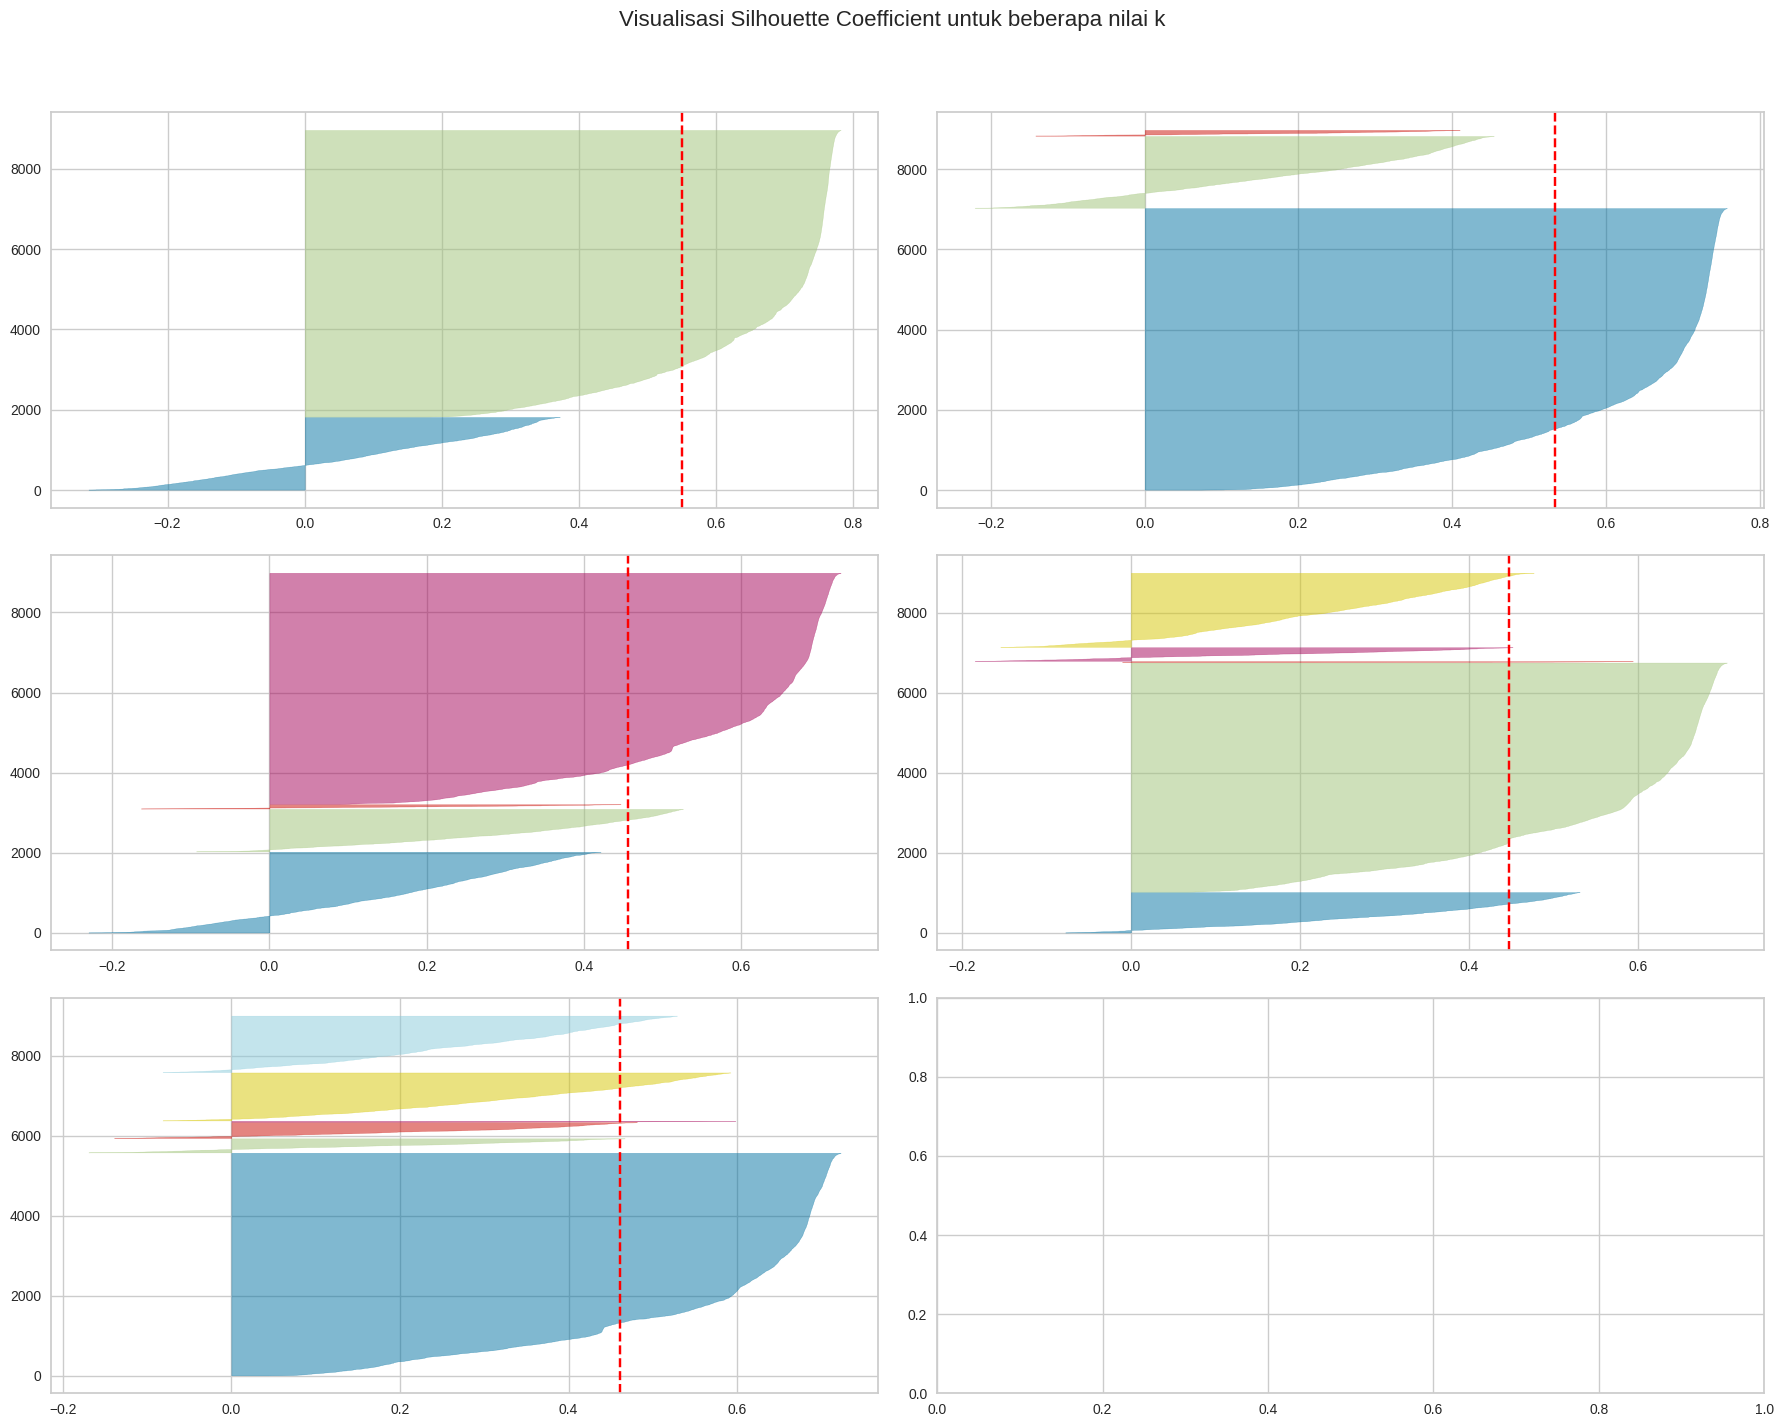

In [13]:
# Visualisasi silhouette coefficient
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k", fontsize=16)
k_values = range(2, 7)
for idx, k in enumerate(k_values):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    row, col = divmod(idx, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_selected)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Cara menganalisa SilhouetteVisualizer:
- Setiap warna mewakili cluster yang berbeda
- Lebar plot cluster (Y-axis) adalah jumlah sampel dalam cluster
- Cluster terdefinisi dengan baik kalau plot clusternya mendekati SC 1 (atau sebagian besar plotnya melewati garis merah putus2)
- Seluruh cluster terdefinisi dengan baik jika cluster-cluster yang berbeda memiliki bentuk plot yang relatif sama (konsisten dan tidak ada fluktuasi signifikan) dan terdapat sedikit atau tidak ada sampel dengan SC negatif

Selain menggunakan **Silhouette Coefficient**, kita juga bisa menentukan jumlah cluster yang optimal dengan cara lain, yaitu **Elbow Method**. Untuk elbow method, kita hanya perlu melihat di titik mana penurunan inertia sudah tidak signifikan lagi, atau di mana terjadi perubahan drastis pada gradien kurva.

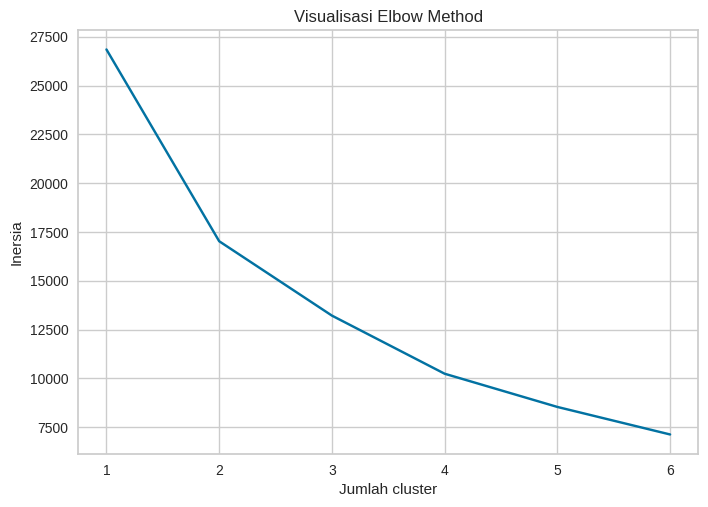

In [14]:
inertia = []
cluster_range = range(1, 7)

for cluster in cluster_range:
    km = KMeans(n_clusters=cluster, n_init=10, random_state=42)
    km = km.fit(df_selected)
    inertia.append(km.inertia_)

plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Jumlah cluster')
plt.ylabel('Inersia')
plt.title('Visualisasi Elbow Method')

plt.show()

Terlihat bahwa di titik jummlah cluster=2, tekukannya paling tajam, sehingga k=2 adalah jumlah cluster yang lumayan optimal.

Bisa dilihat dari SC dan visualisasi yang dilakukan diatas, k=2 dan 3 menjadi kandidat jumlah cluster yang bagus, tetapi untuk tutorial ini, kita akan memakai k=2 saja

Sekarang kita coba train model dengan jumlah cluster yang optimal (k=2)

In [15]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
cluster_assignment = kmeans.fit_predict(df_selected)

In [16]:
# Buat dataframe baru dengan hasil cluster
df_with_clusters = pd.DataFrame(df_selected.copy())
df_with_clusters['cluster'] = cluster_assignment
df_with_clusters.head()

,BALANCE,CREDIT_LIMIT,PURCHASES,cluster
0,-0.731989,-0.960383,-0.424900,1
1,0.786961,0.688676,-0.469552,0
2,0.447135,0.826098,-0.107668,0
3,0.049099,0.826098,0.232058,1
4,-0.358775,-0.905414,-0.462063,1


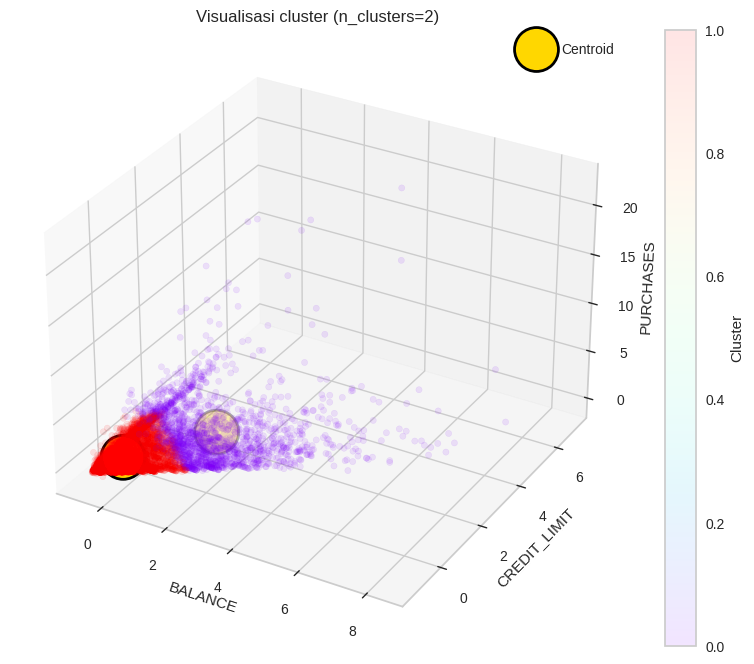

In [17]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
# ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_with_clusters["BALANCE"]
y = df_with_clusters['CREDIT_LIMIT']
z = df_with_clusters['PURCHASES']
cluster = df_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.1)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster (n_clusters=2)")
ax.set_xlabel(df_with_clusters.columns[0])
ax.set_ylabel(df_with_clusters.columns[1])
ax.set_zlabel(df_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

kita coba ubah viewing anglenya

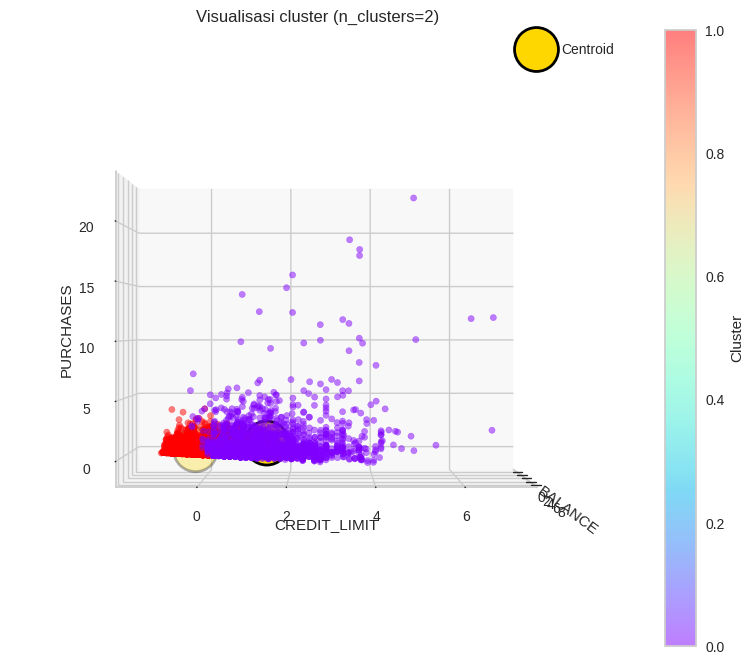

In [18]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_with_clusters["BALANCE"]
y = df_with_clusters['CREDIT_LIMIT']
z = df_with_clusters['PURCHASES']
cluster = df_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.5)

# Tambah centroid
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster (n_clusters=2)")
ax.set_xlabel(df_with_clusters.columns[0])
ax.set_ylabel(df_with_clusters.columns[1])
ax.set_zlabel(df_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

In [19]:
# Posisi Centroid
kmeans.cluster_centers_

array([[ 1.35618254,  1.43850517,  0.64918762],
       [-0.34379417, -0.36466307, -0.16456997]])

Contoh interpretasi singkat:
Cluster merah cenderung mempunyai credit limit dan balance yang rendah. Walaupun jumlah duit yang dikeluarkan oleh cluster merah cenderung sama dengan cluster ungu, namun sebagian customer dari cluster ungu ada yang mengeluarkan lebih banyak duit. Oleh karena itu, cluster ungu berpotensi untuk ditargetkan sebagai segmen premium (mempunyai nilai tinggi)

# Hierarchical Clustering

(Untuk Hierarchical CLustering, kita coba menggunakan `df_pca`)

Dengan Hierarchical Clustering, kita bisa menentukan jumlah cluster yang optimal tanpa harus menentukan jumlahnya di awal seperti pada KMeans. Caranya adalah dengan mencari garis vertikal terpanjang yang tidak terpotong oleh garis horizontal. Garis horizontal yang kita tarik untuk "memotong" dendrogram akan menentukan jumlah cluster, tergantung di level mana kita ingin membaginya

![image.png](https://statsandr.com/blog/clustering-analysis-k-means-and-hierarchical-clustering-by-hand-and-in-r_files/optimal%20number%20of%20clusters%20hierarchical%20clustering.png)
<sub>Sumber: (https://statsandr.com/blog/files/Hierarchical-clustering-cheatsheet.pdf)</sub>

Sekarang kita coba buat modelnya

In [20]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment = model.fit(df_pca)

In [21]:
# Fungsi untuk plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    shc.dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

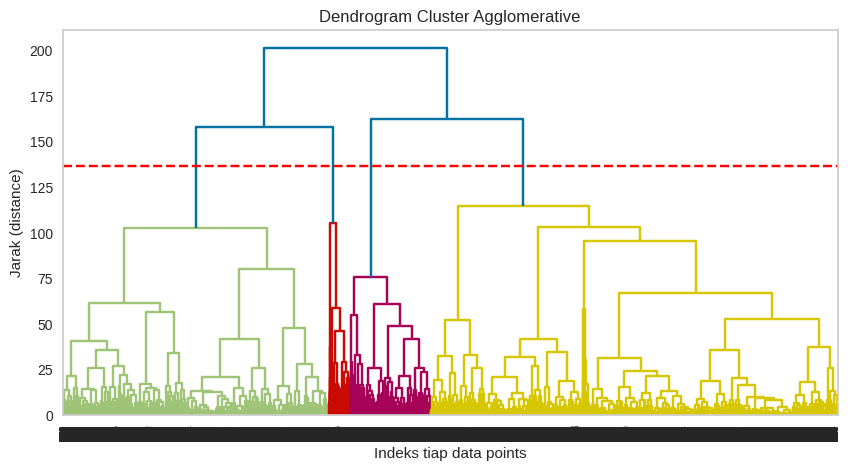

In [22]:
plt.figure(figsize=(10, 5))
plt.grid(False)
linkage_matrix = plot_dendrogram(model, truncate_mode=None)
plt.title("Dendrogram Cluster Agglomerative")
plt.xlabel("Indeks tiap data points")
plt.ylabel("Jarak (distance)")

# Untuk mencari optimal cut
distances = linkage_matrix[:, 2]
gaps = np.diff(distances)
max_gap_idx = np.argmax(gaps)
optimal_cut = (distances[max_gap_idx] + distances[max_gap_idx + 1]) / 2

plt.axhline(y=optimal_cut, color='red', linestyle='dashed')
plt.show()

Bisa dilihat bahwa garis putus-putus horizontal merah memotong 4 garis vertikal, sehingga jumlah cluster yang baik adalah 4.

Selanjutnya kita coba bikin model dengan n_clusters=4

In [23]:
# Pilih n_clusters berdasarkan dendrogram
agglomerative = AgglomerativeClustering(n_clusters=4)
cluster_assignment = agglomerative.fit_predict(df_pca)

In [24]:
# Append hasil cluster ke df original
df_with_clusters = pd.DataFrame(df.copy())
df_with_clusters['cluster'] = cluster_assignment + 1
df_with_clusters['cluster'] = 'Cluster ' + df_with_clusters['cluster'].astype(str)
df_with_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Cluster 1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Cluster 1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Cluster 4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,690.912329,0.000000,12,Cluster 1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Cluster 1


In [25]:
# Group berdasarkan cluster dan hitung statistik deskriptif
df_cluster_stats = df_with_clusters.groupby('cluster').describe().T.reset_index()
df_cluster_stats = df_cluster_stats.rename(columns={'level_0': 'Feature', 'level_1': 'Metric'})

In [26]:
# Hanya ambil mean (Kalian juga bisa pakai median)
df_centroids = df_cluster_stats[df_cluster_stats['Metric'] == 'mean'].set_index('Feature')

In [27]:
# Display
df_centroids.columns.name = "Feature"
df_centroids.index.name = None
df_centroids.style.background_gradient(cmap='Greys')

Feature,Metric,Cluster 1,Cluster 2,Cluster 3,Cluster 4
BALANCE,mean,1151.909270,4224.803789,4752.392451,1018.041287
BALANCE_FREQUENCY,mean,0.823304,0.976846,0.953182,0.928617
PURCHASES,mean,320.729734,9412.049184,655.677100,1479.101327
ONEOFF_PURCHASES,mean,212.646380,6324.018000,423.116498,766.328835
INSTALLMENTS_PURCHASES,mean,108.455007,3090.480163,232.669807,712.850646
CASH_ADVANCE,mean,726.293136,840.829455,4708.680790,247.522797
PURCHASES_FREQUENCY,mean,0.250883,0.927112,0.360612,0.859581
ONEOFF_PURCHASES_FREQUENCY,mean,0.090996,0.723142,0.182429,0.336884
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.160257,0.750334,0.238417,0.682839
CASH_ADVANCE_FREQUENCY,mean,0.122992,0.088707,0.509826,0.044128


Contoh interpretasi:<br>

Cluster 1: Pengguna Pasif

Memiliki balance yang rendah dengan aktivitas transaksi yang sangat minim. Credit limitnya juga cenderung rendah. Nasabah mungkin jarang menggunakan kartu kredit mereka sehingga berpotensi menjadi nasabah tidak aktif

Cluster 2: Power shopper

Pengeluaran dan jumlah transaksi pembeliannya tinggi. Memiliki credit limit yang besar dan pembayaran (PAYMENTS) yang tinggi juga. Merepresentasikan nasabah yang sering berbelanja dengan nilai tinggi

Cluster 3: Pengambil pinjaman

Cash advance nya tinggi dengan frekuensi cash advance yang juga tinggi. Minimum paymentsnya cenderung besar, sementara persentase full payment mereka terendah (PRC_FULL_PAYMENT). Mungkin nasabah dalam cluster ini mengandalkan kartu kredit terutama untuk kebutuhan pinjaman tunai.

Cluster 4: Nasabah Teratur

Pola pembelian dan jumlah transaksi nya moderat. Persentase full payment tertinggi dibanding cluster lainnya. Bisa jadi mencerminkan nasabah yang disiplin dalam menggunakan kartu kreditnya

# Latihan

## Deskripsi Dataset

In [28]:
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


| Kolom         | Deskripsi                                                                 |
|---------------|---------------------------------------------------------------------------|
| #             | Nomor urut Pokémon dalam Pokédex.                                        |
| Name          | Nama dari Pokémon.                                                       |
| Type 1        | Tipe utama dari Pokémon (misal: Water, Fire, Grass, dll).                |
| Type 2        | Tipe sekunder dari Pokémon (jika ada). Bisa bernilai null.               |
| Total         | Total nilai statistik (penjumlahan dari HP, Attack, Defense, dll).       |
| HP            | Hit Points (darah/nyawa) dari Pokémon.                                   |
| Attack        | Nilai serangan fisik Pokémon.                                            |
| Defense       | Nilai pertahanan fisik Pokémon.                                          |
| Sp. Atk       | Nilai serangan spesial (seperti jurus elemen).                           |
| Sp. Def       | Nilai pertahanan terhadap serangan spesial.                              |
| Speed         | Kecepatan Pokémon.                        |
| Generation    | Generasi Pokémon (dari 1 hingga 6).                                      |
| Legendary     | Apakah Pokémon termasuk kategori Legendary (`True`) atau bukan (`False`).|


## Preprocessing dataset

In [30]:
df_pokemon = df.copy()

In [31]:
# Drop ID column
df_pokemon = df_pokemon.drop(['#'], axis=1)

### Fill missing values

In [32]:
def fill_null(df, column_name, distribution_type):
    """
    Fills null values in a DataFrame column based on the distribution type.

    Args:
        df: pandas DataFrame.
        column_name: Name of the column to fill.
        distribution_type: Distribution type of the column ('normal', 'skewed', or 'categorical').

    Returns:
        pandas DataFrame with filled null values.
    """

    if df[column_name].dtype == 'object':  # If the column is categorical (non-numeric)
        # If the column is categorical, use the mode for imputation.
        replacement_value = "Unknown"
    elif distribution_type == 'normal':
        # If the column is normally distributed, use the mean for imputation.
        replacement_value = df[column_name].mean()
    elif distribution_type == 'skewed':
        # If the column is skewed, use the median for imputation.
        replacement_value = df[column_name].median()
    else:
        # For unknown distribution types or if no imputation method is specified, fill with 0.
        replacement_value = 0

    df[column_name] = df[column_name].fillna(replacement_value)
    return df  # Return the updated DataFrame

In [33]:
df_pokemon.isnull().sum()

,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


In [34]:
# Fill missing values
fill_null(df_pokemon, 'Type 2', '') # data object

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Unknown,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [35]:
df_pokemon.isnull().sum()

,0
Name,0
Type 1,0
Type 2,0
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


### Penanganan Nilai Duplikat

In [36]:
df_pokemon.duplicated().sum()

np.int64(0)

### Penanganan outliers

In [37]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [38]:
numerical_pokemon = df_pokemon.select_dtypes(include=np.number)
print("Outlier pada data pokemon")
outliers_pokemon = dict(check_outlier(numerical_pokemon).sum())

Outlier pada data pokemon
Outlier pada tiap atribut:
Total          0
HP            19
Attack         7
Defense       13
Sp. Atk       10
Sp. Def        7
Speed          2
Generation     0
dtype: int64


Boxplot data pokemon


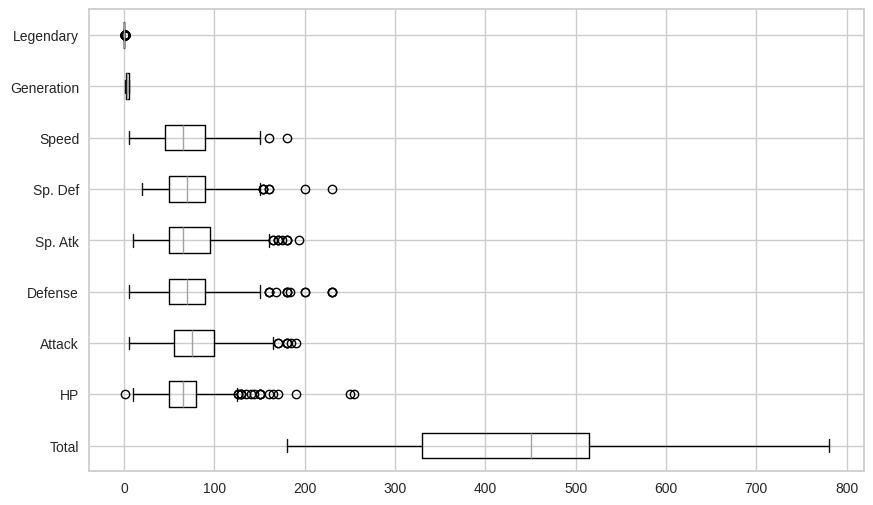

In [39]:
print("Boxplot data pokemon")
plt.figure(figsize=(10, 6))
boxplot = df_pokemon.boxplot(figsize=(12,10), vert=False)
plt.show()

### Encoding fitur kategorikal

In [40]:
for col in df_pokemon.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_pokemon[col].value_counts(), '\n')

No. of unique values in column Name:
Name
PumpkabooSuper Size      1
PumpkabooLarge Size      1
PumpkabooSmall Size      1
PumpkabooAverage Size    1
Trevenant                1
                        ..
Charmander               1
VenusaurMega Venusaur    1
Venusaur                 1
Ivysaur                  1
Bulbasaur                1
Name: count, Length: 800, dtype: int64 

No. of unique values in column Type 1:
Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64 

No. of unique values in column Type 2:
Type 2
Unknown     386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Wate

In [41]:
Type_mapping = {
  'Unknown': 0,
  'Water': 1,
  'Normal': 2,
  'Grass': 3,
  'Bug': 4,
  'Psychic': 5,
  'Fire': 6,
  'Rock': 7,
  'Electric': 8,
  'Ground': 9,
  'Ghost': 10,
  'Dragon': 11,
  'Dark': 12,
  'Poison': 13,
  'Fighting': 14,
  'Steel': 15,
  'Ice': 16,
  'Fairy': 17,
  'Flying': 18,
}

df_pokemon['Type 1'] = df_pokemon['Type 1'].map(Type_mapping)
df_pokemon['Type 2'] = df_pokemon['Type 2'].map(Type_mapping)
df_pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,3,13,318,45,49,49,65,65,45,1,False
1,Ivysaur,3,13,405,60,62,63,80,80,60,1,False
2,Venusaur,3,13,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,3,13,625,80,100,123,122,120,80,1,False
4,Charmander,6,0,309,39,52,43,60,50,65,1,False


In [42]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    int64 
 2   Type 2      800 non-null    int64 
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(10), object(1)
memory usage: 69.7+ KB


## Pemilihan Fitur

Kalian harus:
- Memilih minimal 2 fitur yang akan dipakai untuk keperluan clustering, dan/atau
- Melakukan PCA pada dataset untuk clustering, dan/atau
- Menggunakan pendekatan lain

Wajib memberi alasan mengapa memakai fitur dan/atau pendekatan tertentu.

In [43]:
# pemilihan fitur
df_pokemon_chosen = df_pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation','Legendary']]

In [44]:
# df dengan PCA
df_pca_pokemon = df_pokemon_chosen.copy()
pca_pokemon = PCA(n_components=5, random_state=42)
df_pca_pokemon = pd.DataFrame(pca_pokemon.fit_transform(df_pca_pokemon))

In [45]:
explained_variance_pokemon = pca_pokemon.explained_variance_ratio_
cumulative_explained_variance_pokemon = np.cumsum(explained_variance_pokemon)

print(f"Cumulative explained variance: {cumulative_explained_variance_pokemon}")

Cumulative explained variance: [0.46072284 0.64814613 0.78391616 0.88190052 0.95564442]


In [46]:
df_pca_pokemon.head()

,0,1,2,3,4
0,-45.864571,-5.388855,-18.926915,-0.996160,12.393116
1,-11.156966,-5.810125,-20.850057,0.261379,5.795242
2,36.941722,-5.240743,-21.521777,1.523021,-2.451360
3,80.123909,18.990495,-29.315390,-11.237277,8.678907
4,-50.389763,-21.797219,-3.923235,-12.589403,7.352645


Alasan:

Langkah 1: Pemilihan Fitur

Statistik Pertarungan Inti yang terdiri dari HP, Attack, Defense, Sp. Atk, Sp.Def, dan Speed merupakan representasi seberapa kuat, tangguh, atau cepat suatu pokemon.

Generation membantu mengidentifikasi pola desain statistik antar-generasi.

Legendary memisahkan Pokemon yang legendary atau langka dari Pokemon biasa.

Langkah 2: Penerapan PCA

Penerapan Principal Component Analysis (PCA) untuk mengurangi kompleksitas data tanpa mengorbankan informasi penting. Dari 8 fitur yang dipilih sebelumnya, PCA menghasilkan 5 komponen utama yang mampu mempertahankan variansi data sebesar 95.5%. Hal ini membantu clustering lebih efisien dan akurat dengan mengatasi masalah dimensi tinggi dan korelasi antar fitur.

## KMeans Clustering

### Soal 1

Hitunglah Silhouette Coefficient score untuk fitur yang sudah kalian pilih. k yang digunakan setidaknya 2 (k $\geq$ 2)

In [47]:
# Menghitung silhouette coefficient untuk beberapa nilai k
print("Compare nilai silhouete coefficient")
print("=================================================")
for k in range(2,10):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(df_pokemon_chosen)
    silhouette_avg = silhouette_score(df_pokemon_chosen, cluster_labels, random_state=42)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg:.4f}")

Compare nilai silhouete coefficient
Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.2882
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.2614
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.2277
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.2271
Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.2259
Untuk k = 7, rata-rata silhouette_coefficient adalah: 0.2247
Untuk k = 8, rata-rata silhouette_coefficient adalah: 0.1676
Untuk k = 9, rata-rata silhouette_coefficient adalah: 0.1619


### Soal 2

Visualisasikan Silhouette Coefficient yang didapat sebelumnya menggunakan SilhouetteVisualizer. Berikan interpretasinya

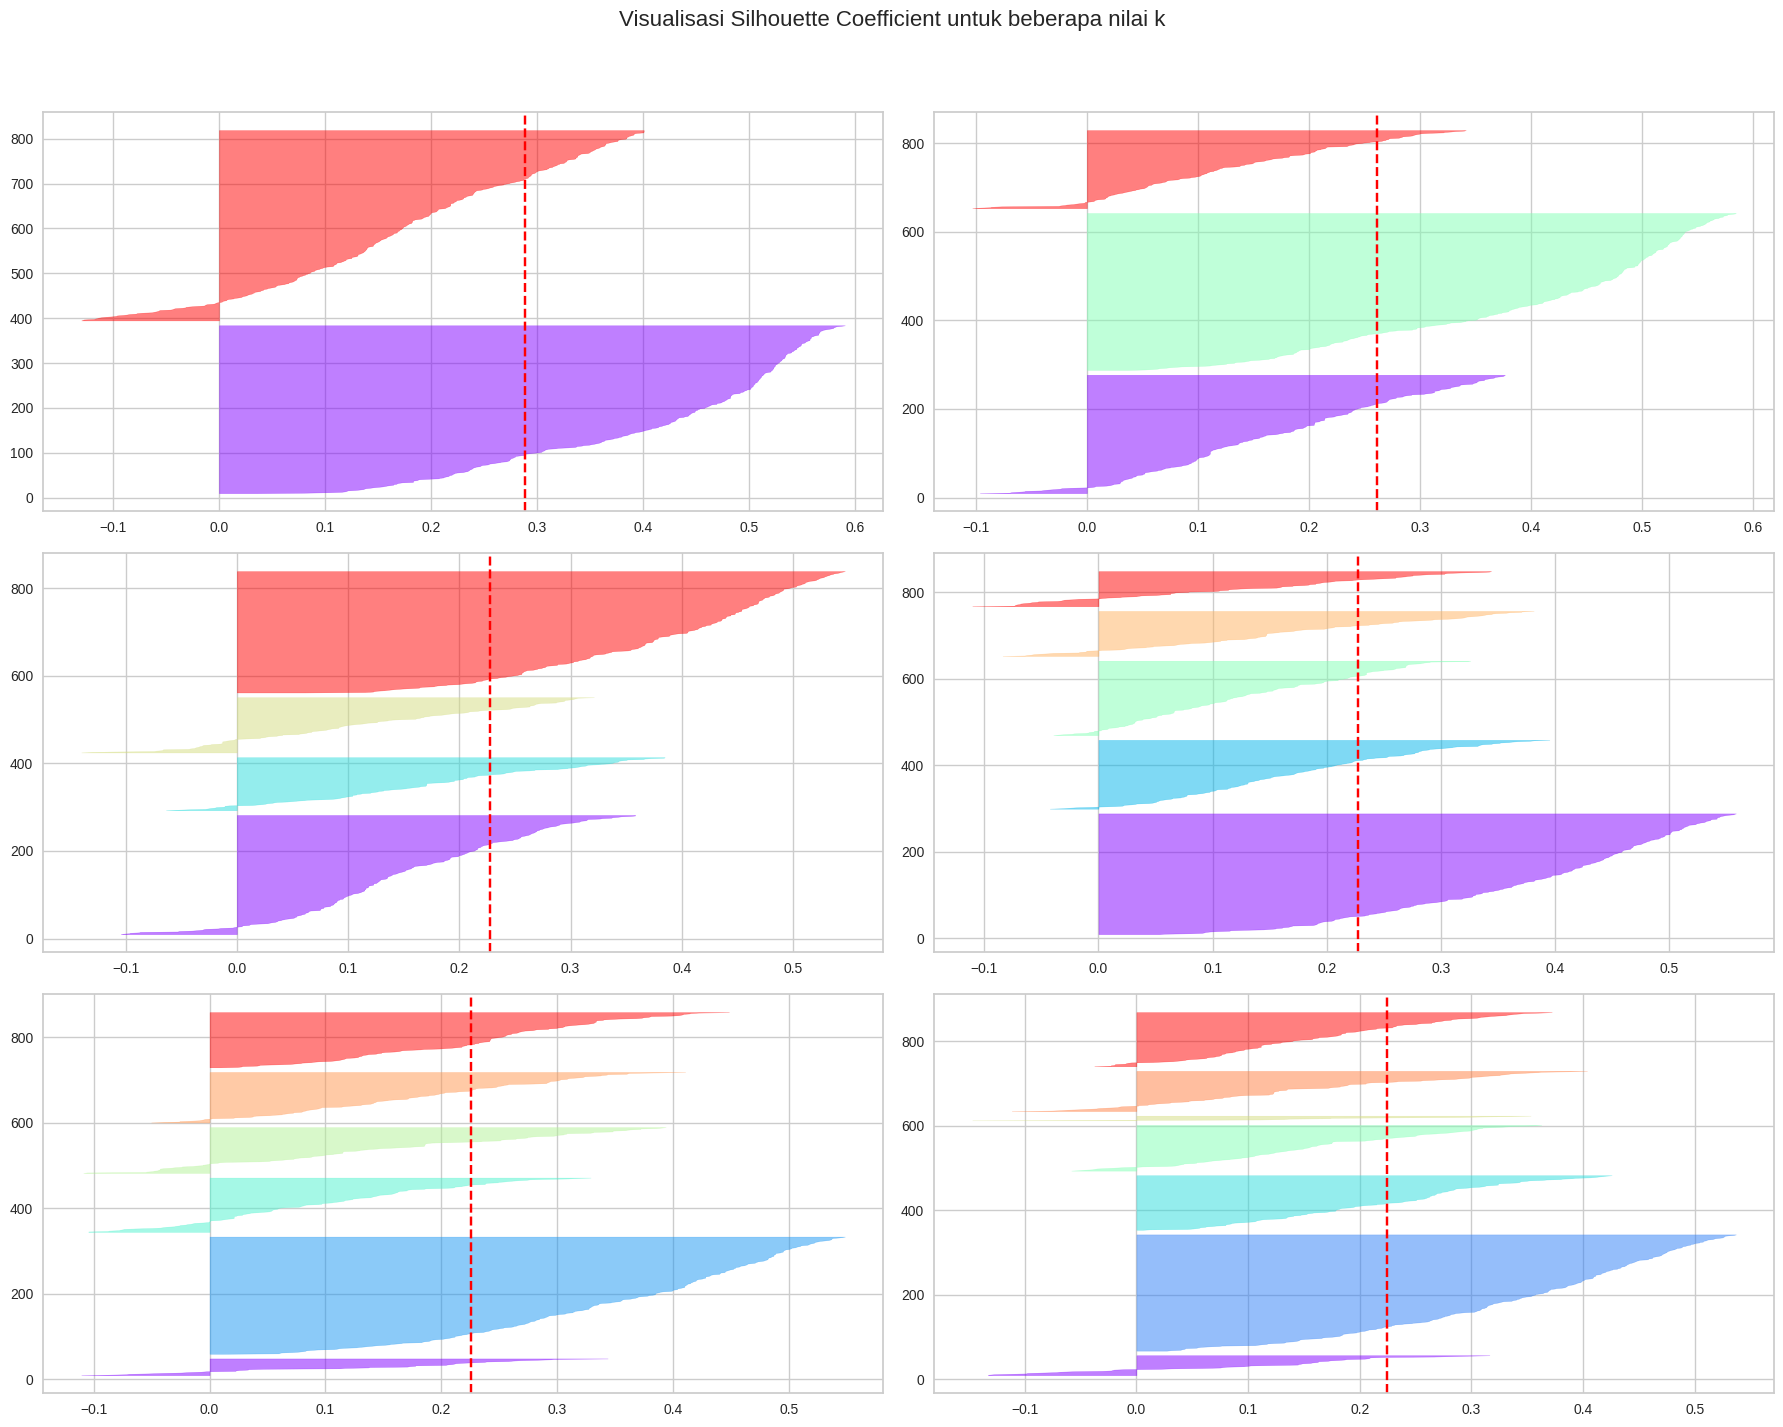

In [48]:
# Visualisasi silhouette coefficient
fig, ax = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k", fontsize=16)
k_values = range(2, 8)
for idx, k in enumerate(k_values):
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=42)
    row, col = divmod(idx, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors='rainbow', ax=ax[row][col])
    visualizer.fit(df_pokemon_chosen)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Soal 3

Tampilkan juga visualisasi elbow method (range k nya boleh beda). Berikan interpretasinya

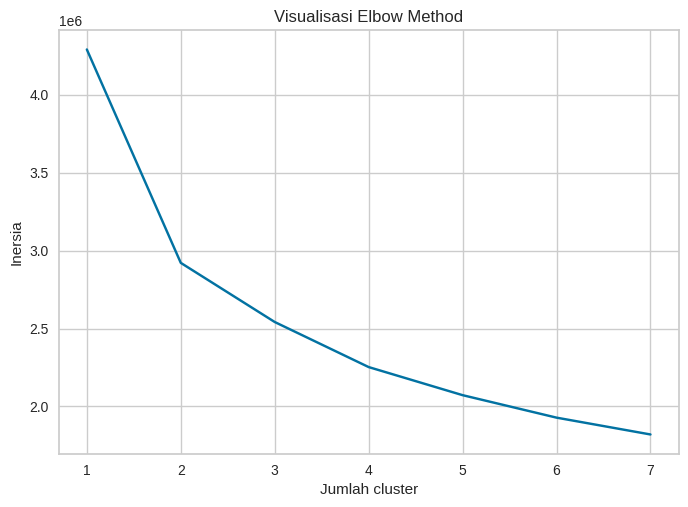

In [49]:
inertia = []
cluster_range = range(1, 8)

for cluster in cluster_range:
    km = KMeans(n_clusters=cluster, n_init=10, random_state=42)
    km = km.fit(df_pokemon_chosen)
    inertia.append(km.inertia_)

plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Jumlah cluster')
plt.ylabel('Inersia')
plt.title('Visualisasi Elbow Method')

plt.show()

### Soal 4

Berdasarkan jawaban kalian pada soal 1-3, tentukan jumlah cluster (nilai k) yang optimal. Jelaskan alasannya

In [50]:
k_optimal = 2

Jumlah cluster optimal adalah k=2.

Alasan:
- Silhouette Coefficient tertinggi berupa k=2 yaitu sebesar 0.2882 sehingga menunjukkan cluster yang terbentuk paling kohesif secara internal dan terpisah dengan satu sama lain.
- Distribusi nilai Silhouette lebih baik untuk k=2 dibandingkan k lainnya yang terlihat pada visualisasi Silhoutte relatif besar, lebar, dan padat. Hal ini mengindikasikan pembagian yang baik tanpa banyak tumpang tindih atau sampel yang ditempatkan dengan buruk.
- Elbow Method menunjukkan titik perubahan signifikan di k=2, hal ini terlihat dari penurunan inersia paling signifikan dari 1 ke 2 klaster. Hal ini menandakan 2 klaster sudah cukup menjelaskan sebagian besar variasi dalam data.

### Soal 5

Latih model KMeans dengan nilai k yang kalian tentukan pada Soal 4.

In [51]:
kmeans_pokemon = KMeans(n_clusters=k_optimal, n_init=10, random_state=42)
cluster_assignment_pokemon = kmeans_pokemon.fit_predict(df_pokemon_chosen)

### Soal 6

Visualisasikan hasil clustering KMeans-nya dan berikan interpretasi dari visualisasi yang kalian dapat

In [52]:
# Buat dataframe baru dengan hasil cluster
df_pokemon_with_clusters = pd.DataFrame(df_pokemon_chosen.copy())
df_pokemon_with_clusters['cluster'] = cluster_assignment_pokemon
df_pokemon_with_clusters.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster
0,45,49,49,65,65,45,1,False,0
1,60,62,63,80,80,60,1,False,0
2,80,82,83,100,100,80,1,False,1
3,80,100,123,122,120,80,1,False,1
4,39,52,43,60,50,65,1,False,0


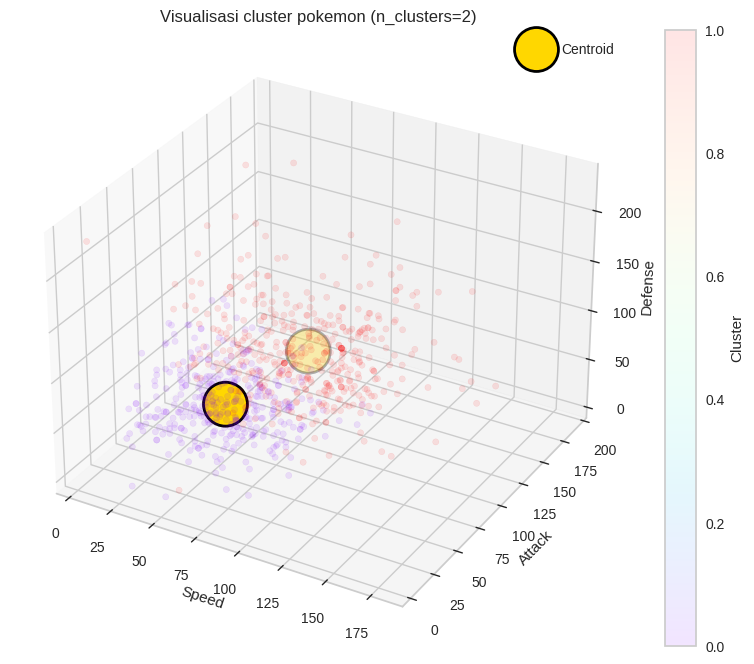

In [53]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
# ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_pokemon_with_clusters['Speed']
y = df_pokemon_with_clusters['Attack']
z = df_pokemon_with_clusters['Defense']
cluster = df_pokemon_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.1)

# Tambah centroid
centroids = kmeans_pokemon.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster pokemon (n_clusters=2)")
ax.set_xlabel(df_pokemon_with_clusters.columns[5])
ax.set_ylabel(df_pokemon_with_clusters.columns[1])
ax.set_zlabel(df_pokemon_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

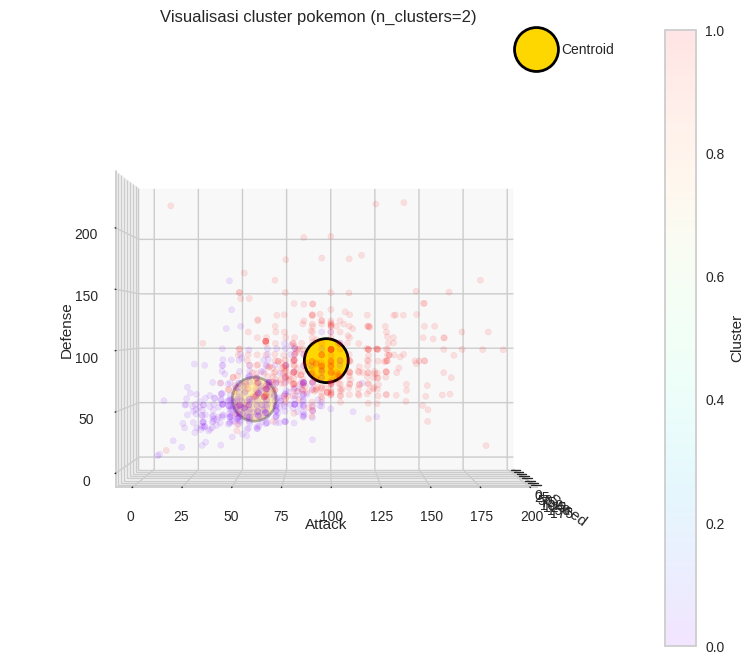

In [54]:
# Visualisasi 3D
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

# Untuk ngubah viewing anglenya
ax.view_init(elev=0, azim=0)

# Untuk kasus ini memakai 3 variabel untuk visualisasi
x = df_pokemon_with_clusters['Speed']
y = df_pokemon_with_clusters['Attack']
z = df_pokemon_with_clusters['Defense']
cluster = df_pokemon_with_clusters['cluster']

# Visualisasi hasil clustering
sc = ax.scatter(x, y, z, c=cluster, cmap="rainbow", alpha=0.1)

# Tambah centroid
centroids = kmeans_pokemon.cluster_centers_
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='gold', s=1000, marker='o', edgecolor='black', linewidth=2, label='Centroid'
)

plt.title("Visualisasi cluster pokemon (n_clusters=2)")
ax.set_xlabel(df_pokemon_with_clusters.columns[5])
ax.set_ylabel(df_pokemon_with_clusters.columns[1])
ax.set_zlabel(df_pokemon_with_clusters.columns[2])
plt.colorbar(sc, label='Cluster')
plt.legend()
plt.show()

In [55]:
# Posisi Centroid
kmeans_pokemon.cluster_centers_

array([[ 5.49200000e+01,  5.80373333e+01,  5.54826667e+01,
         5.24426667e+01,  5.34320000e+01,  5.40746667e+01,
         3.23466667e+00, -4.85722573e-16],
       [ 8.19105882e+01,  9.74988235e+01,  9.00423529e+01,
         9.08000000e+01,  8.82000000e+01,  8.08094118e+01,
         3.40235294e+00,  1.52941176e-01]])

Interpretasi:

Cluster merah cenderung memiliki Attack, Defense, dan Speed yang besar. Sedangkan, cluster ungu memiliki Attack, Defense, dan Speed yang kecil. Oleh karena itu, cluster merah memiliki potensi untuk menang lebih besar dari cluster ungu karena nilai serangan (Attack), pertahanan (Defense), dan kecepatan (Speed) yang lebih besar.

## Hierarchical Clustering

### Soal 1

Latih model AgglomerativeClustering dengan fitur yang sudah kalian pilih

In [56]:
model_pokemon_pca = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster_assignment_pokemon_pca = model_pokemon_pca.fit(df_pca_pokemon)

### Soal 2

Visualisasikan dendogram dari model Agglomerativenya. Berikan interpretasinya dan tentukan juga jumlah cluster yang optimal dari visualisasi yang didapat.

In [57]:
# Fungsi untuk plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    shc.dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

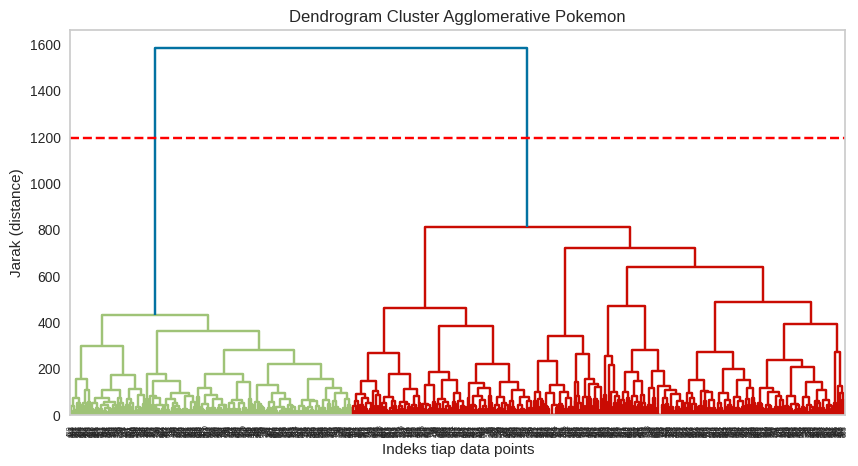

In [58]:
plt.figure(figsize=(10, 5))
plt.grid(False)
linkage_matrix = plot_dendrogram(model_pokemon_pca, truncate_mode=None)
plt.title("Dendrogram Cluster Agglomerative Pokemon")
plt.xlabel("Indeks tiap data points")
plt.ylabel("Jarak (distance)")

# Untuk mencari optimal cut
distances_pokemon = linkage_matrix[:, 2]
gaps_pokemon = np.diff(distances_pokemon)
max_gap_idx_pokemon = np.argmax(gaps_pokemon)
optimal_cut_pokemon = (distances_pokemon[max_gap_idx_pokemon] + distances_pokemon[max_gap_idx_pokemon + 1]) / 2

plt.axhline(y=optimal_cut_pokemon, color='red', linestyle='dashed')
plt.show()

### Soal 3

Latih model AgglomerativeClustering dengan jumlah cluster yang sudah ditentukan sebelumnya

In [59]:
agglomerative_pokemon = AgglomerativeClustering(n_clusters=k_optimal)
cluster_assignment_pokemon = agglomerative_pokemon.fit_predict(df_pca_pokemon)

In [60]:
# Append hasil cluster ke df original
df_pokemon_with_clusters = pd.DataFrame(df.copy())
df_pokemon_with_clusters['cluster'] = cluster_assignment_pokemon + 1
df_pokemon_with_clusters['cluster'] = 'Cluster ' + df_pokemon_with_clusters['cluster'].astype(str)
df_pokemon_with_clusters.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Cluster 2
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Cluster 1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Cluster 1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Cluster 1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Cluster 2


### Soal 4

Visualisasikan hasil clustering AgglomerativeClustering-nya dan bandingkan hasilnya dengan hasil dari kMeans Clustering.

In [61]:
# Group berdasarkan cluster dan hitung statistik deskriptif
df_cluster_stats_pokemon = df_pokemon_with_clusters.groupby('cluster').describe().T.reset_index()
df_cluster_stats_pokemon = df_cluster_stats_pokemon.rename(columns={'level_0': 'Feature', 'level_1': 'Metric'})

In [62]:
# Hanya ambil mean (Kalian juga bisa pakai median)
df_centroids_pokemon = df_cluster_stats_pokemon[df_cluster_stats_pokemon['Metric'] == 'mean'].set_index('Feature')

In [63]:
# Display
df_centroids_pokemon.columns.name = "Feature"
df_centroids_pokemon.index.name = None
df_centroids_pokemon.style.background_gradient(cmap='Greys')

Feature,Metric,Cluster 1,Cluster 2
#,mean,370.068762,350.123711
Total,mean,507.905697,307.759450
HP,mean,79.868369,50.701031
Attack,mean,92.758350,54.938144
Defense,mean,85.316306,53.773196
Sp. Atk,mean,86.793713,48.378007
Sp. Def,mean,84.108055,50.553265
Speed,mean,79.060904,49.415808
Generation,mean,3.324165,3.323024


Penjelasan:

Interpretasi Agglomerative:

Cluster 1: Pokémon Kuat

Nilai fitur Total jauh lebih tinggi disbanding cluster 2 yaitu sebesar 507.91. Selain itu, Pokémon pada cluster ini memiliki nilai HP, Attack, Defense, Sp. Atk, Sp. Def, dan Speed yang juga jauh lebih tinggi pada cluster ini. Hal ini menandakan bahwa Pokémon pada cluster ini termasuk kuat dan handal dalam ofensif maupun defensif.

Cluster 2: Pokémon Dasar

Seluruh nilai statistik pertarungan paling rendah dibandingkan cluster lain yaitu pada fitur HP, Attack, Defense, Sp. Atk, Sp. Def, dan Speed. Nilai fitur Total juga merupakan yang terendah sebesar 307.76. Cluster ini kemungkinan besar terdiri dari Pokémon yang berada pada tahap evolusi awal atau yang memang didesain tidak terlalu dominan.

# Soal Teoritis

### Soal 1

Jika kita menggunakan KMeans berulang kali, apakah hasil clusteringnya akan sama?

Tidak selalu, karena KMeans menginisialisasi centroid awal secara acak (bersifat nondeterministik) sehingga apabila dijalankan berulangkali pada data yang sama tanpa adanya pengaturan inisialisasi yang konsisten maka hasil clustering akan berbeda-beda. Hal ini dapat terjadi karena posisi awal centroid dapat memengaruhi konvergensi dan pembentukan cluster akhir.

### Soal 2

Diketahui pada Agglomerative Clustering terdapat beberapa Proximity Measures, yaitu Single, Complete, dan Average Link. Jelaskan Pros n cons dari ketiga Proximity Measures tersebut.

Proximity Measure: Single Link (Jarak minimum antar cluster)

Pros:
- Mampu mengidentifikasi pola cluster dengan bentuk tidak beraturan atau memanjang (non-spherical).
- Memiliki sensitivitas tinggi terhadap hubungan lokal antar titik data.
- Efektif dalam membentuk rantai konektivitas berdasarka kedekatan   dapat menghubungkan titik-titik terdekat secara berantai.

Cons:
- Rentan terhadap masalah efek chaining, yaitu membentuk cluster seperti panjang dan tipis yang kurang representatif.
- Berpotensi menggabungkan cluster yang sebenarnya berbeda hanya karena ada titik penghubung yang dekat.
- Kurang ideal untuk data dengan noise karena terlalu sensitif terhadap outlier lokal.

Proximity Measure: Complete Link (Jarak maksimum antar cluster)

Pros:
- Menghasilkan formasi cluster yang lebih padat dan seragam.
- Meminimalkan risiko efek chaining dengan memperhatikan jarak maksimum antar anggota cluster.
- Lebih robust terhadap noise dibanding single link.

Cons:
- Sensitif terhadap outlier karena jarak maksimum bisa dipengaruhi oleh titik yang jauh dari cluster.
- Cenderung membentuk cluster berbentuk bulat atau elips atau batasan yang terlalu rigid.
- Kurang fleksibel untuk bentuk cluster yang kompleks.

Proximity Measure: Average Link (Jarak rata-rata antar cluster)

Pros:
- Menawarkan keseimbangan antara single dan complete link.
- Hasil clustering lebih stabis dengan mempertimbangkan seluruh distribusi titik.
- Lebih toleran terhadap outlier dibanding complete link.

Cons:
- Membutuhkan komputasi lebih mahal dibanding single dan complete link karena menghitung rata-rata jarak semua pasangan titik antar cluster.
- Batas antar cluster mungkin kurang tegas dibanding complete link.
- Tidak sepenuhnya bebas dari masalah chaining effect seperti single link.

### Soal 3

Algoritma KMeans tidak cocok untuk data yang tidak bersifat hyper-ellipsoid. Mengapa?

KMeans dirancang untuk cluster berbentuk bulat atau elips (hyper-ellipsoid) dengan ukuran dan kepadatan yang seragam.

Hal ini karena KMeans menggunakan jarak Euclidean ke centroid sebagai ukuran kedekatan. Jarak Eucliden sendiri efektif untuk cluster berbentuk convex (cembung) dan isotropik (menyebar merata di semua arah).

Jika data memiliki cluster dengan bentuk non-konveks, ukuran berbeda, kepadatan tidak merata, atau pola yang kompleks, KMeans cenderung gagal mengelompokkan data secara akurat karena centroid tidak dapat merepresentasikan pusat cluster dengan baik.

Oleh karena itu, KMeans kurang efektif untuk data dengan cluster non-hyperellipsoid dan lebih cocok menggunakan metode lain seperti DBSCAN (untuk cluster berbentuk bebas) atau Agglomerative Clustering dengan penyesuaian linkage.

# Soal Hitungan KMeans

Di bagian ini kalian diminta untuk melakukan clustering dengan KMeans from scratch secara bertahap menggunakan dataset yang berisi kumpulan data point (x,y). Kalian bisa langsung ketik jawabannya dengan markdown. Kalian dibolehkan menggunakan code python untuk menghitung, tetapi tidak boleh langsung memakai KMeans bawaan. Berikut ketentuan lainnya:
- Gunakan **Manhattan distance**
- Gunakan **jumlah cluster = 2 (k=2)**
- Tahap penting yang harus kalian lakukan adalah **Inisialisasi Centroid**, **Perhitungan Jarak ke Centroid**, **Assign cluster**, **Update Centroid**, dan **Cek Stopping Criteria (Khusus iterasi 2 dan seterusnya)**.

In [64]:
data = pd.read_csv("kmeans.csv")
data.head()

,x,y
0,10.0,5.0
1,10.0,8.5
2,1.0,5.0
3,9.0,10.5
4,3.5,8.0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       14 non-null     float64
 1   y       14 non-null     float64
dtypes: float64(2)
memory usage: 356.0 bytes


In [66]:
def manhattan_distance(a, b):
    return np.abs(a - b).sum()

## Bagian 1

### Iterasi 1

Kalian boleh memakai cell Iterasi x ini sebagai panduan pengisian jawaban

#### Inisialisasi Centroid

Melakukan inisialisasi centroid secara acak.

In [67]:
# Inisialisasi centroid secara acak
np.random.seed(42)  # Untuk reproduktifitas
initial_centroids = data.sample(n=2).values
centroids = initial_centroids
print("Inisialisasi Centroid:")
print(centroids)

Inisialisasi Centroid:
[[ 2.5 12. ]
 [ 8.   8. ]]


#### Perhitungan jarak ke Centroid

Menghitung jarak setiap titik ke centroid dengan manhattan distance

In [68]:
def manhattan_distance(a, b):
    return np.abs(a - b).sum(axis=1)

# Hitung jarak ke centroid
def calculate_distances(data, centroids):
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = manhattan_distance(data.values, centroids[i])
    return distances

distances = calculate_distances(data, centroids)
print("Jarak ke Centroid:")
print(distances)

Jarak ke Centroid:
[[14.5  5. ]
 [11.   2.5]
 [ 8.5 10. ]
 [ 8.   3.5]
 [ 5.   4.5]
 [12.5  3. ]
 [ 8.5  9. ]
 [ 4.   7.5]
 [ 8.5  6. ]
 [ 0.   9.5]
 [15.   5.5]
 [ 9.5  0. ]
 [ 4.5  6. ]
 [ 9.   6.5]]


#### Assign Cluster

Meng-assign setiap titik data pada cluster 1 atau 0.

In [69]:
# Assign cluster berdasarkan jarak terdekat
def assign_clusters(distances):
    return np.argmin(distances, axis=1)

clusters = assign_clusters(distances)
print("Cluster yang ditugaskan:")
print(clusters)

Cluster yang ditugaskan:
[1 1 0 1 1 1 0 0 1 0 1 1 0 1]


#### Update Centroid

Memperbarui centroid berdasarkan rata-rata posisi cluster.

In [70]:
# Update centroid berdasarkan rata-rata posisi cluster
def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        new_centroids[i] = data[clusters == i].mean(axis=0)
    return new_centroids

k = 2
centroids = update_centroids(data, clusters, k)
print("Centroid yang diperbarui:")
print(centroids)

Centroid yang diperbarui:
[[2.1        7.5       ]
 [8.         7.16666667]]


### Iterasi 2

#### Perhitungan jarak ke Centroid

In [71]:
distances = calculate_distances(data, centroids)
print("Jarak ke Centroid:")
print(distances)

Jarak ke Centroid:
[[10.4         4.16666667]
 [ 8.9         3.33333333]
 [ 3.6         9.16666667]
 [ 9.9         4.33333333]
 [ 1.9         5.33333333]
 [ 8.4         2.16666667]
 [ 4.4         8.16666667]
 [ 2.1         8.33333333]
 [12.4         6.83333333]
 [ 4.9        10.33333333]
 [10.9         4.66666667]
 [ 6.4         0.83333333]
 [ 0.4         5.83333333]
 [ 4.9         5.66666667]]


#### Assign Cluster

In [72]:
clusters = assign_clusters(distances)
print("Cluster yang ditugaskan:")
print(clusters)

Cluster yang ditugaskan:
[1 1 0 1 0 1 0 0 1 0 1 1 0 0]


#### Update Centroid

In [73]:
k = 2
centroids = update_centroids(data, clusters, k)
print("Centroid yang diperbarui:")
print(centroids)

Centroid yang diperbarui:
[[2.64285714 7.21428571]
 [9.14285714 7.35714286]]


### Iterasi 3

#### Perhitungan jarak ke Centroid

In [74]:
distances = calculate_distances(data, centroids)
print("Jarak ke Centroid:")
print(distances)

Jarak ke Centroid:
[[ 9.57142857  3.21428571]
 [ 8.64285714  2.        ]
 [ 3.85714286 10.5       ]
 [ 9.64285714  3.28571429]
 [ 1.64285714  6.28571429]
 [ 7.57142857  3.5       ]
 [ 3.57142857  9.5       ]
 [ 2.92857143  9.28571429]
 [12.14285714  5.5       ]
 [ 4.92857143 11.28571429]
 [10.07142857  5.        ]
 [ 6.14285714  1.78571429]
 [ 0.42857143  6.78571429]
 [ 4.07142857  7.        ]]


#### Assign Cluster

In [75]:
clusters = assign_clusters(distances)
print("Cluster yang ditugaskan:")
print(clusters)

Cluster yang ditugaskan:
[1 1 0 1 0 1 0 0 1 0 1 1 0 0]


#### Update Centroid

In [76]:
k = 2
latest_centroids = update_centroids(data, clusters, k)
print("Centroid yang diperbarui:")
print(latest_centroids)

Centroid yang diperbarui:
[[2.64285714 7.21428571]
 [9.14285714 7.35714286]]


#### Cek Stopping Criteria (khusus iterasi 2 dst.)

Jika sudah terpenuhi, stop algoritma

Stop Iterasi ketika old_centroid bernilai sama dengan new_centroid.

In [77]:
def has_converged(old_centroids, new_centroids):
    return np.all(old_centroids == new_centroids)

In [78]:
if has_converged(centroids, latest_centroids):
    print("Algoritma telah konvergen.")

Algoritma telah konvergen.


## Bagian 2

Ulangi prosedur KMeans yang kalian lakukan di bagian 1, tetapi gunakan **kombinasi centroid awal yang berbeda** (bebas memilih centroid awal, selain yang terdapat di Bagian 1)

### Iterasi 1

Kalian boleh memakai cell Iterasi x ini sebagai panduan pengisian jawaban

#### Inisialisasi Centroid

Melakukan inisialisasi centroid secara acak.

In [79]:
# Inisialisasi centroid secara acak
np.random.seed(24)  # Untuk reproduktifitas
initial_centroids = data.sample(n=2).values
centroids = initial_centroids
print("Inisialisasi Centroid:")
print(centroids)

Inisialisasi Centroid:
[[8.  8. ]
 [8.5 3. ]]


#### Perhitungan jarak ke Centroid

Menghitung jarak setiap titik ke centroid dengan manhattan distance

In [80]:
distances = calculate_distances(data, centroids)
print("Jarak ke Centroid:")
print(distances)

Jarak ke Centroid:
[[ 5.   3.5]
 [ 2.5  7. ]
 [10.   9.5]
 [ 3.5  8. ]
 [ 4.5 10. ]
 [ 3.   2.5]
 [ 9.   6.5]
 [ 7.5 13. ]
 [ 6.  10.5]
 [ 9.5 15. ]
 [ 5.5  0. ]
 [ 0.   5.5]
 [ 6.  10.5]
 [ 6.5  6. ]]


#### Assign Cluster

Meng-assign setiap titik data pada cluster 1 atau 0.

In [81]:
clusters = assign_clusters(distances)
print("Cluster yang ditugaskan:")
print(clusters)

Cluster yang ditugaskan:
[1 0 1 0 0 1 1 0 0 0 1 0 0 1]


#### Update Centroid

Memperbarui centroid berdasarkan rata-rata posisi cluster.

In [82]:
k = 2
centroids = update_centroids(data, clusters, k)
print("Centroid yang diperbarui:")
print(centroids)

Centroid yang diperbarui:
[[5.9375     9.375     ]
 [5.83333333 4.5       ]]


### Iterasi 2

#### Perhitungan jarak ke Centroid

In [83]:
distances = calculate_distances(data, centroids)
print("Jarak ke Centroid:")
print(distances)

Jarak ke Centroid:
[[ 8.4375      4.66666667]
 [ 4.9375      8.16666667]
 [ 9.3125      5.33333333]
 [ 4.1875      9.16666667]
 [ 3.8125      5.83333333]
 [ 6.4375      2.66666667]
 [ 8.3125      3.33333333]
 [ 4.8125      8.83333333]
 [ 6.6875     11.66666667]
 [ 6.0625     10.83333333]
 [ 8.9375      4.16666667]
 [ 3.4375      5.66666667]
 [ 5.3125      6.33333333]
 [ 5.8125      1.83333333]]


#### Assign Cluster

In [84]:
clusters = assign_clusters(distances)
print("Cluster yang ditugaskan:")
print(clusters)

Cluster yang ditugaskan:
[1 0 1 0 0 1 1 0 0 0 1 0 0 1]


#### Update Centroid

In [85]:
k = 2
latest_centroids = update_centroids(data, clusters, k)
print("Centroid yang diperbarui:")
print(latest_centroids)

Centroid yang diperbarui:
[[5.9375     9.375     ]
 [5.83333333 4.5       ]]


#### Cek Stopping Criteria (khusus iterasi 2 dst.)

Jika sudah terpenuhi, stop algoritma

Stop Iterasi ketika old_centroid bernilai sama dengan new_centroid.

In [86]:
if has_converged(centroids, latest_centroids):
    print("Algoritma telah konvergen.")

Algoritma telah konvergen.


## Bagian 3

Berdasarkan bagian 1 dan 2, Ceritakan observasi yang kalian amati. Apakah hasil clusteringnya berbeda? Mengapa bisa sama/berbeda?

Bagian 1 dan 2 menghasilkan clustering yang berbeda.

Pada Bagian 1, berikut hasil clusteringnya.

[1 1 0 1 0 1 0 0 1 0 1 1 0 0]

Hal ini menandakan bahwa masing-masing cluster pada bagian 1 memiliki data point berikut.
- Cluster 1: data point 1, data point 2, data point 4, data point 6, data point 9, data point 11, dan data point 12.
- Cluster 0: data point 3, data point 5, data point 7, data point 8, data point 10, data point 13, dan data point 14.

Sedangkan pada Bagian 2, berikut hasil clusteringnya.

[1 0 1 0 0 1 1 0 0 0 1 0 0 1]

Hal ini menandakan bahwa masing-masing cluster pada bagian 2 memiliki data point berikut.
- Cluster 1: data point 1, data point 3, data point 6, data point 7, data point 11, dan data point 14.
- Cluster 0: data point 2, data point 4, data point 5, data point 8, data point 9, data point 10, data point 12, dan data point 13.

Kedua bagian tersebut memiliki beberapa data point pada cluster yang sama yaitu berikut.
- Cluster 1: data point 1, data point 6, dan data point 11.
- Cluster 0: data point 5, data point 8, data point 10, dan data point 13.

Walaupun terdapat beberapa data point yang berada dalam cluster yang sama untuk kedua bagian, tetapi tentu hasil clustering keduanya secara keseluruhan berbeda. Hal ini terjadi karena sebagai berikut.
- Inisiasi centroid pada masing-masing bagian berbeda.
  - Bagian 1 menggunakan np.random.seed(42) untuk melakukan inisialisasi centroid sehingga didapatkan inisialisasi centroid
  [[ 2.5 12. ] [ 8.   8. ]].
  - Bagian 2 menggunakan np.random.seed(24) untuk melakukan inisialisasi centroid sehingga didapatkan inisialisasi centroid
  [[8.  8. ] [8.5 3. ]]
- Jumlah iterasi pada setiap bagian berbeda.
  - Bagian 1 melakukan iterasi sebanyak 3 kali untuk mencapai telah konvergen atau tidak ada perubahan pada centroid sebelum dan setelah update.
  - Bagian 2 melakukan iterasi sebanyak 2 kali untuk mencapai telah konvergen atau tidak ada perubahan pada centroid sebelum dan setelah update.